PREDICTION OF BIKE RENTAL COUNT DAILY BASED ON THE ENVIRONMENTAL AND SEASONAL SETTING

LIBRARIES IMPORTATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sta
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

import shap
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max.column', None)
pd.set_option('display.max.row', None)
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


PLOT STYLE

In [3]:
sns.set_context('notebook')
plt.style.use('tableau-colorblind10')

In [4]:
data  = pd.read_csv(r"C:\Users\Dell\Desktop\All dataset\day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


DATA CLEANING

In [6]:
data['dteday'] = pd.to_datetime(data['dteday'])

In [7]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

FEATURE ENGINEERING

In [9]:
data['Day'] = pd.to_datetime(data['dteday']).dt.day

In [10]:
num_col = data.select_dtypes(include = ['int', 'float'])
num_col.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Day
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


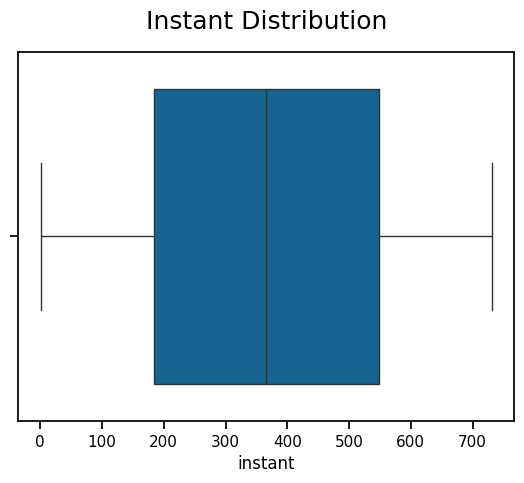

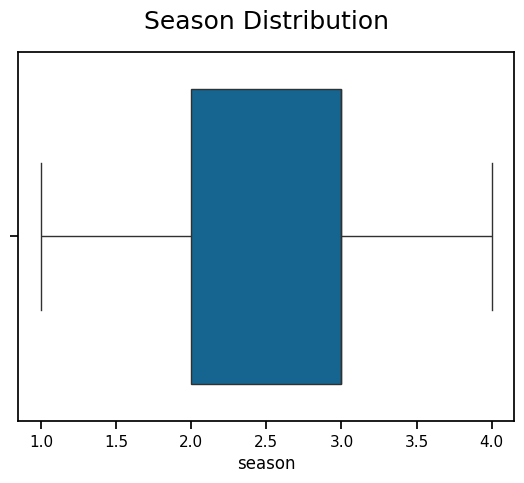

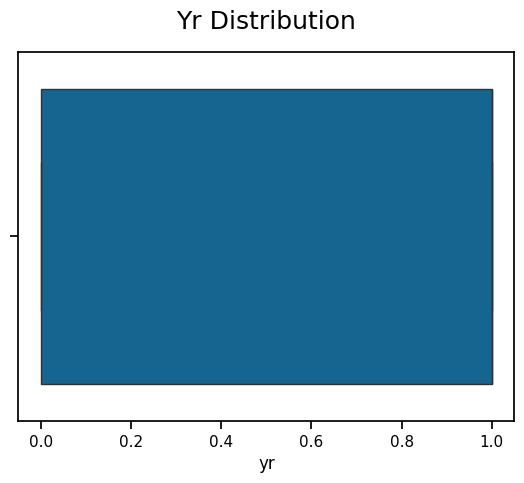

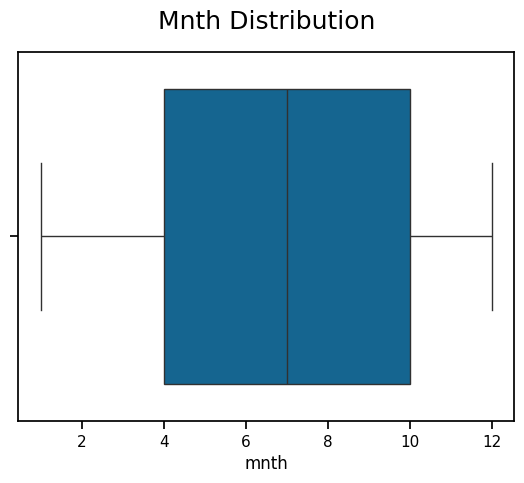

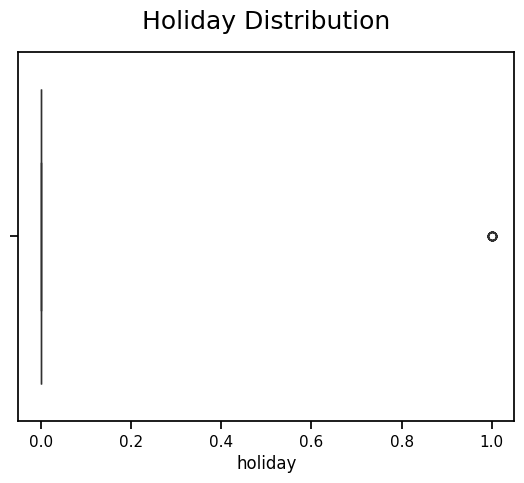

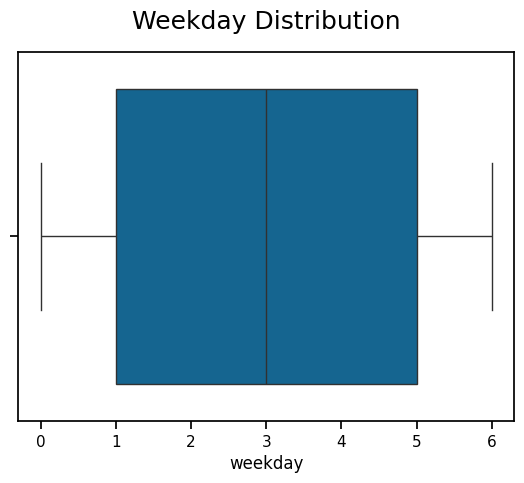

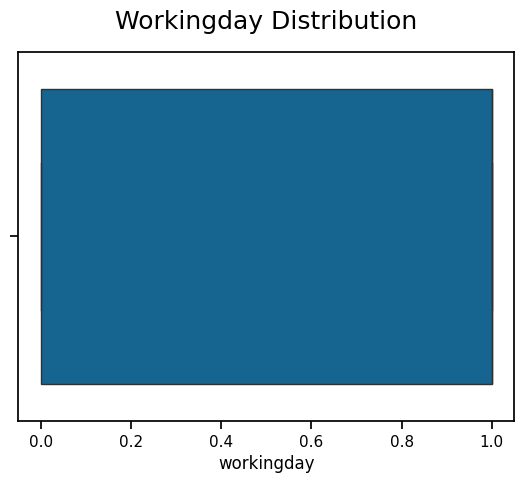

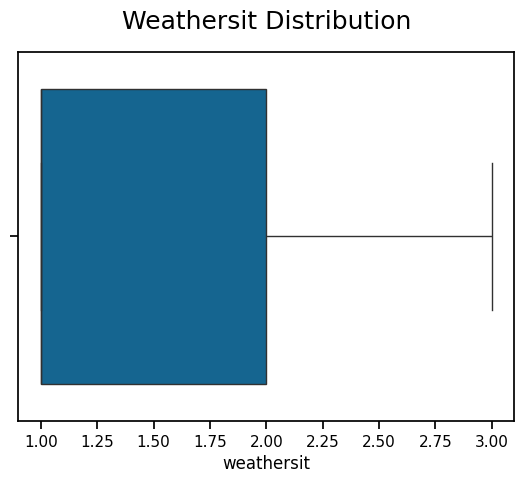

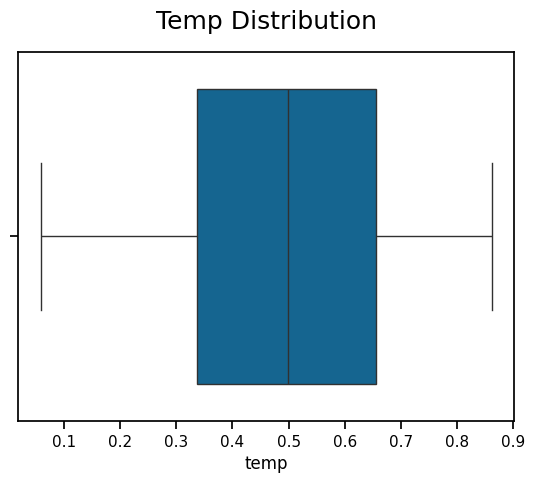

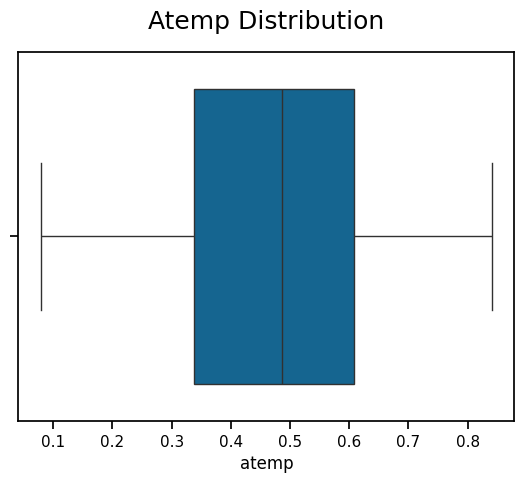

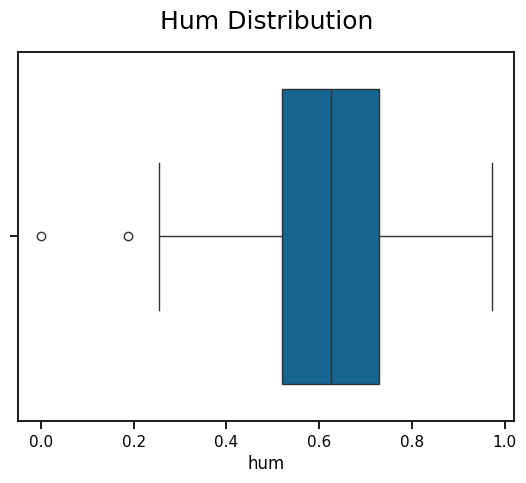

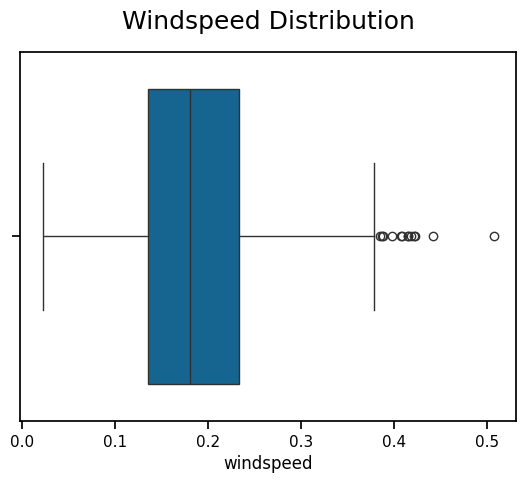

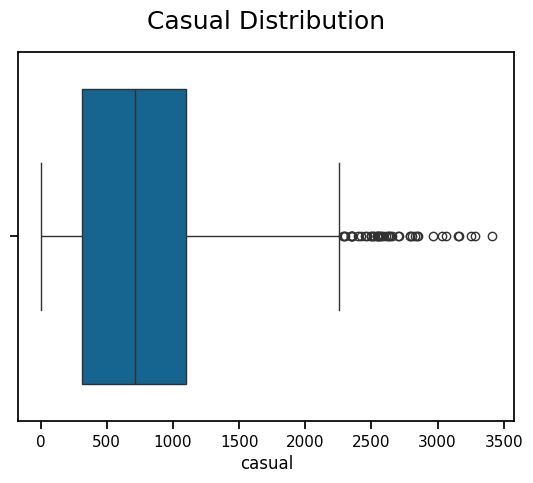

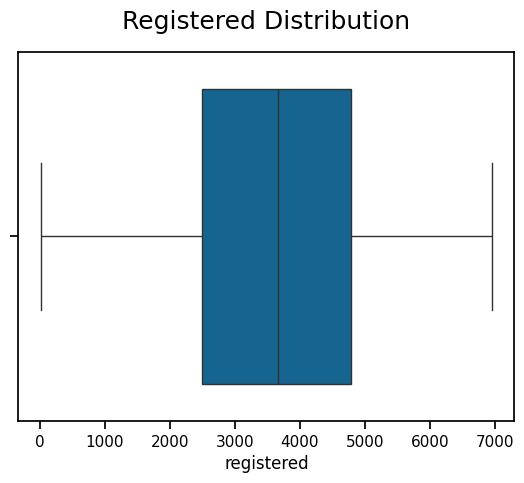

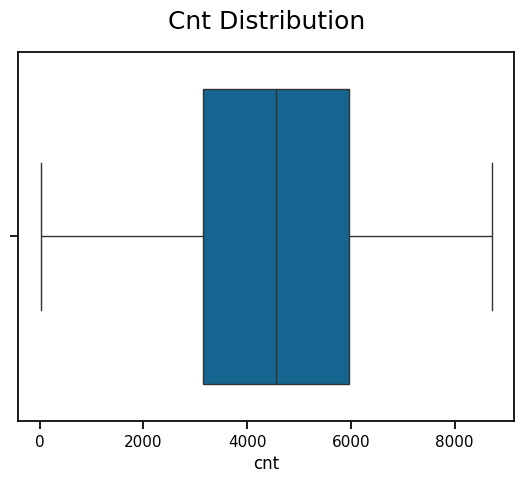

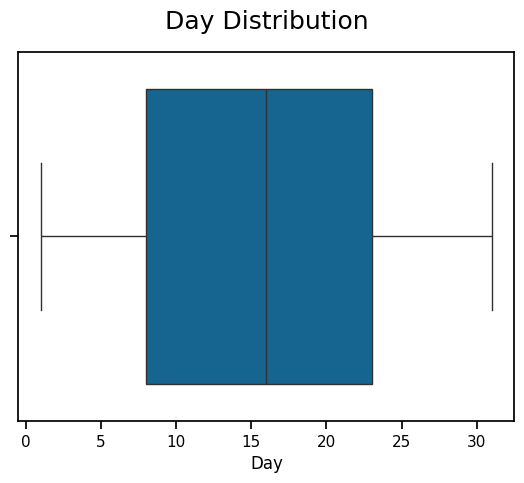

In [11]:
for col in num_col:
    fig, ax = plt.subplots()
    g = sns.boxplot(data[col], orient = 'h')
    g.set_title(f'{col.capitalize()} Distribution', fontsize = 18, y = 1.04)
    plt.show()

In [12]:
for col in num_col:
    data[col] = winsorize(data[col], limits = [0.05, 0.05])

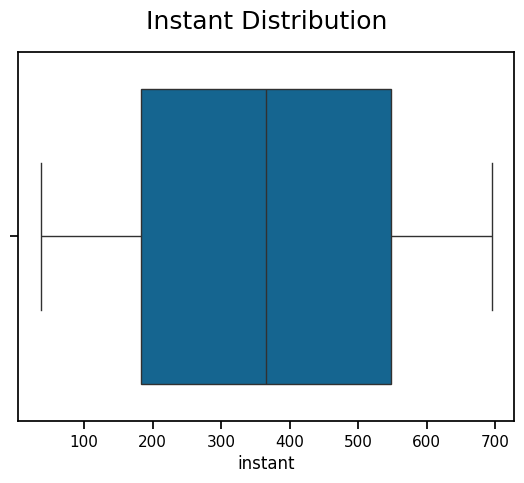

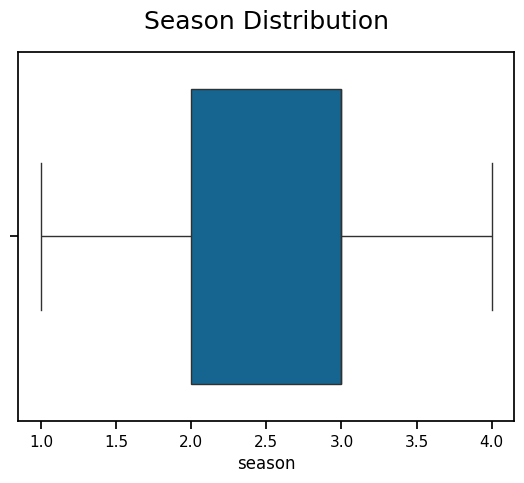

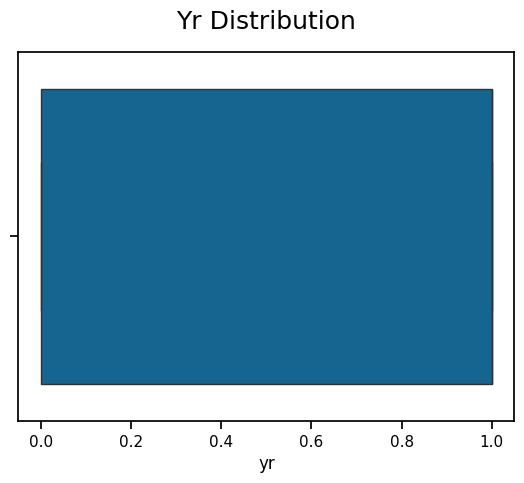

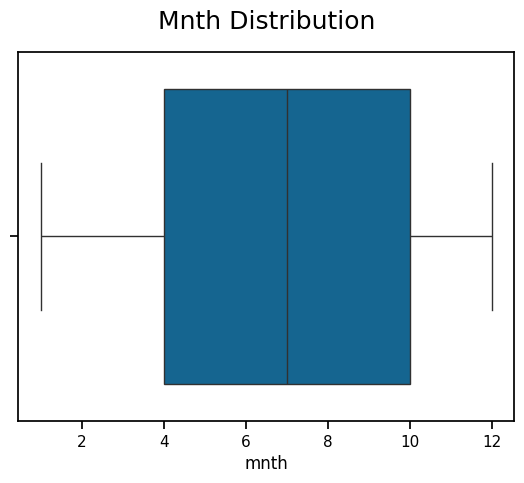

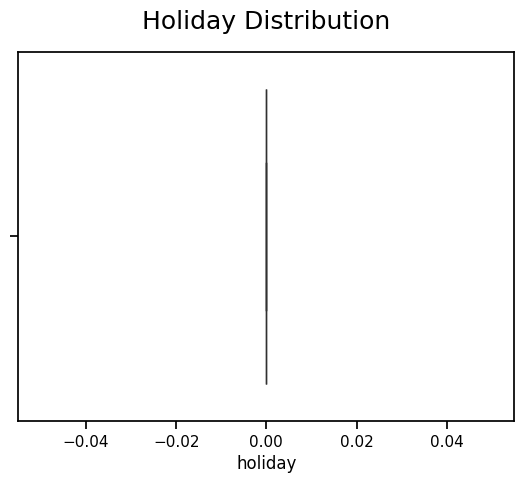

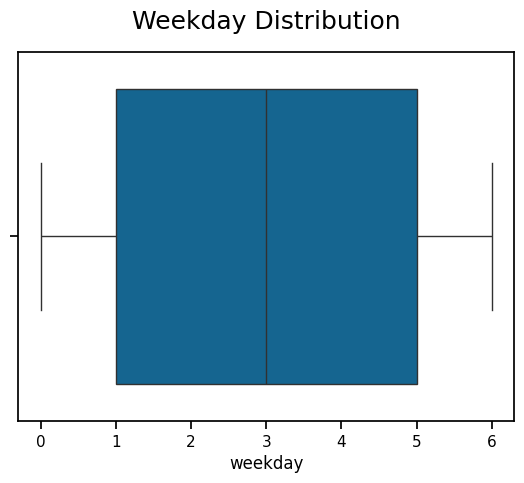

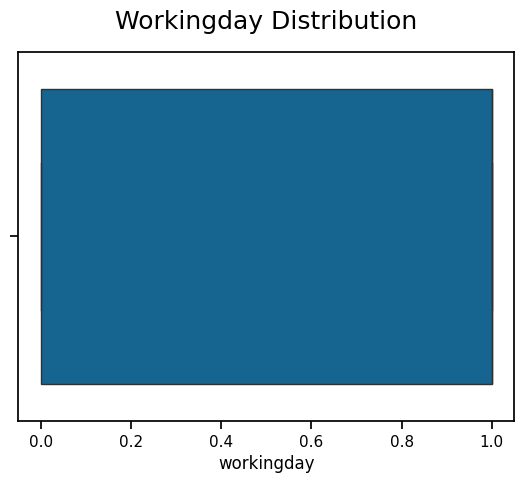

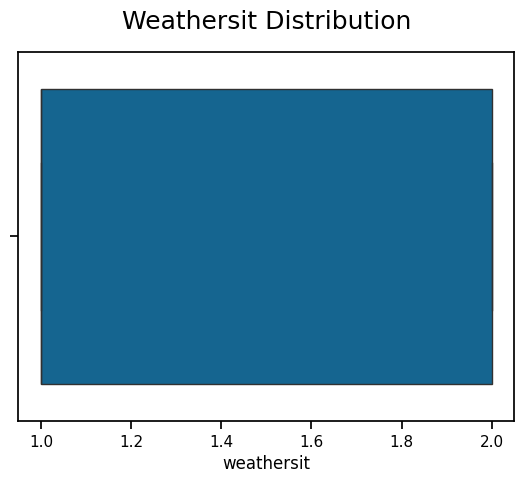

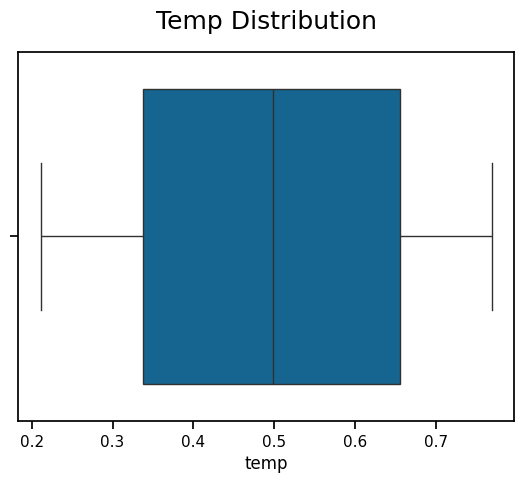

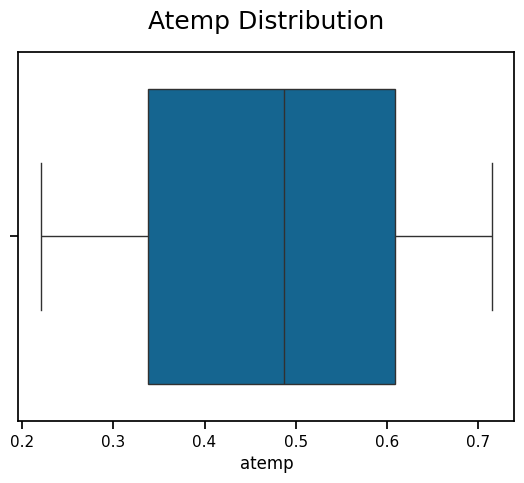

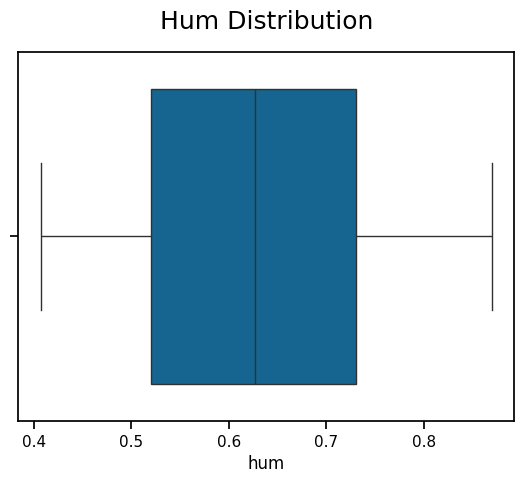

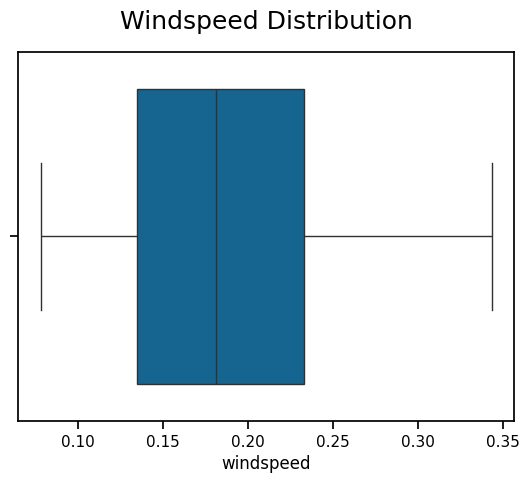

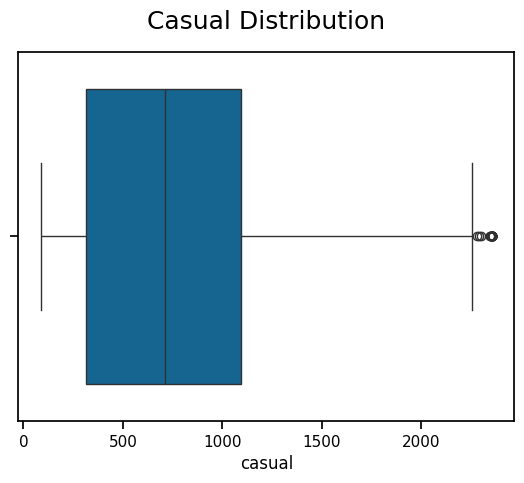

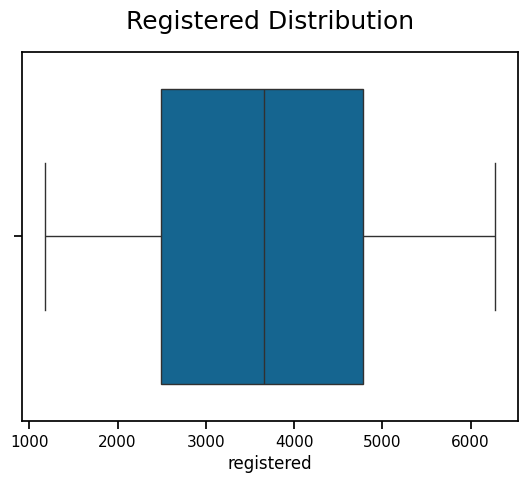

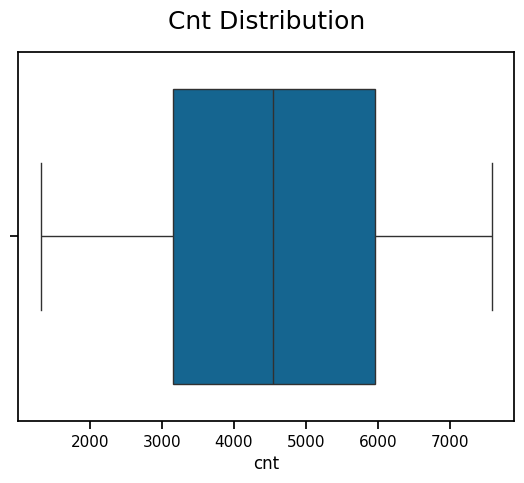

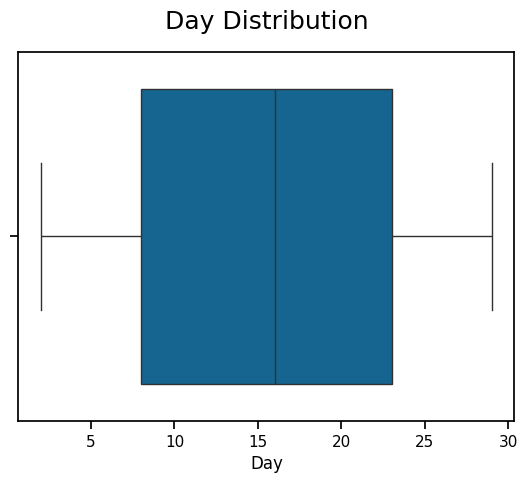

In [13]:
for col in num_col:
    fig, ax = plt.subplots()
    g = sns.boxplot(data[col], orient = 'h')
    g.set_title(f'{col.capitalize()} Distribution', fontsize = 18, y = 1.04)
    plt.show()

In [14]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Day
0,37,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1173,1321,2
1,37,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,1173,1321,2
2,37,2011-01-03,1,0,1,0,1,1,1,0.211304,0.220333,0.437273,0.248309,120,1229,1349,3
3,37,2011-01-04,1,0,1,0,2,1,1,0.211304,0.220333,0.590435,0.160296,108,1454,1562,4
4,37,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,88,1518,1600,5


In [15]:
X = data.drop(['instant', 'dteday', 'casual', 'registered', 'cnt'], axis = 1)
y = data['cnt']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(584, 12) (147, 12) (584,) (147,)


In [17]:
# X_train.to_csv('sample.csv', index = False)

MODEL BUILDING AND TRAINING

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
r2 = r2_score(y_test, y_pred)

print(f'R2 Score is: {r2:.2f}')

R2 Score is: 0.84


In [22]:
mse = mean_squared_error(y_test, y_pred)

print(f'R2 Score is: {mse:.2f}')

R2 Score is: 627491.10


In [23]:
rmse = root_mean_squared_error(y_test, y_pred)

print(f'R2 Score is: {rmse:.2f}')

R2 Score is: 792.14


In [24]:
y_max = 0.2 * y.max()
y_max

np.float64(1516.0)

In [25]:
y_max > rmse

np.True_

Assumption Check

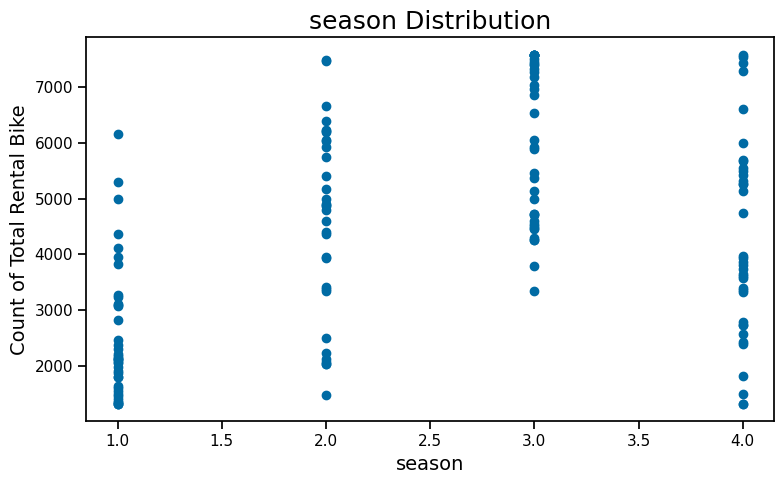

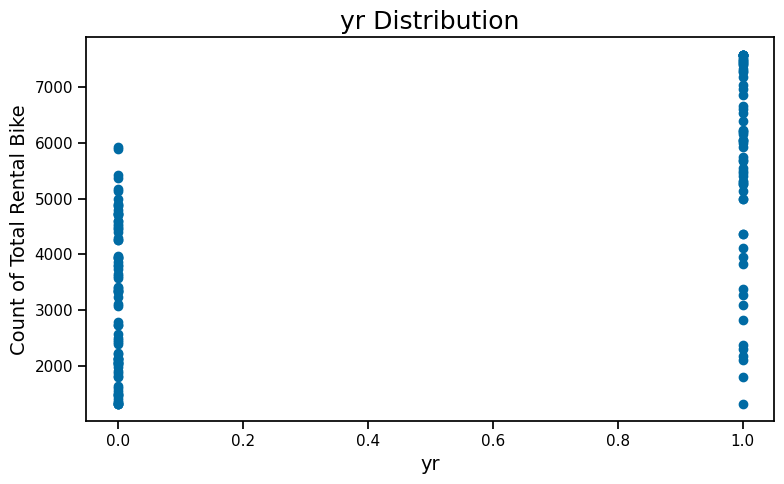

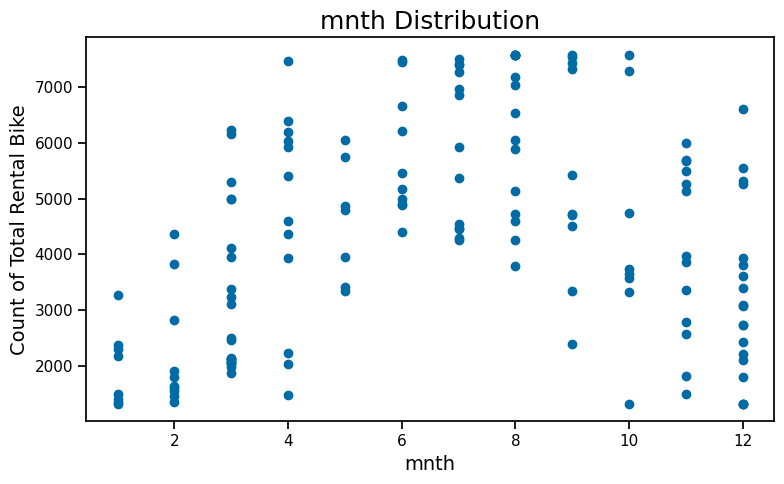

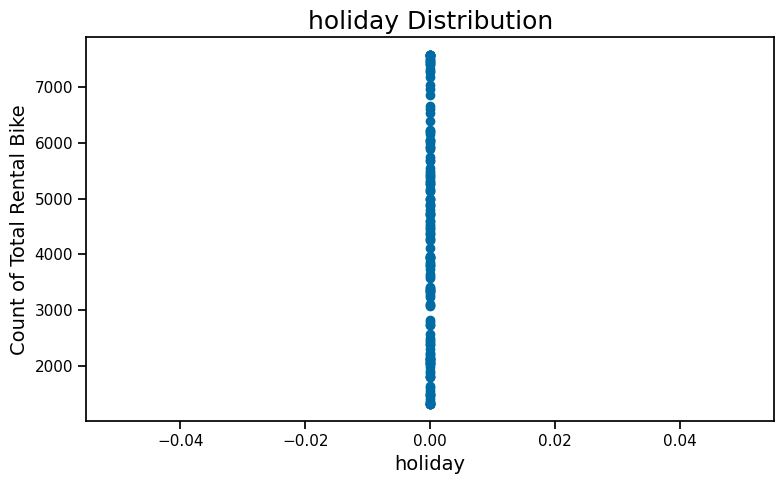

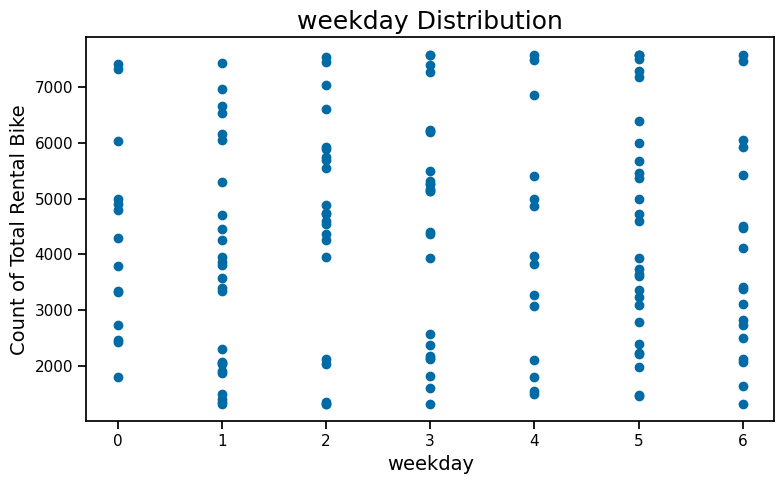

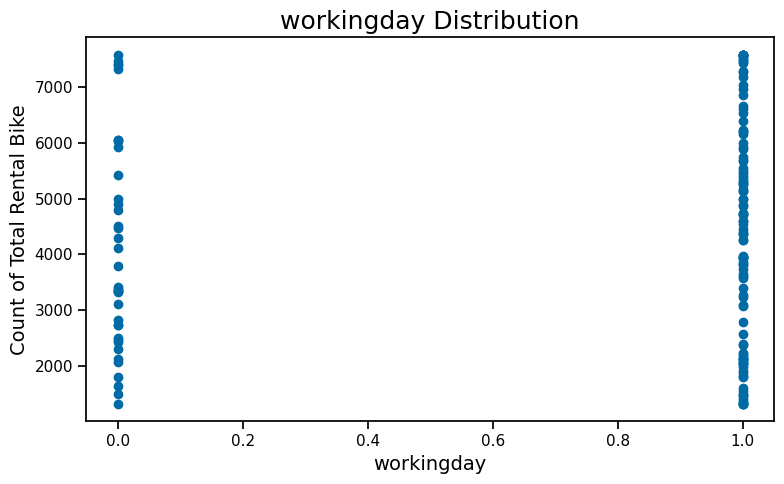

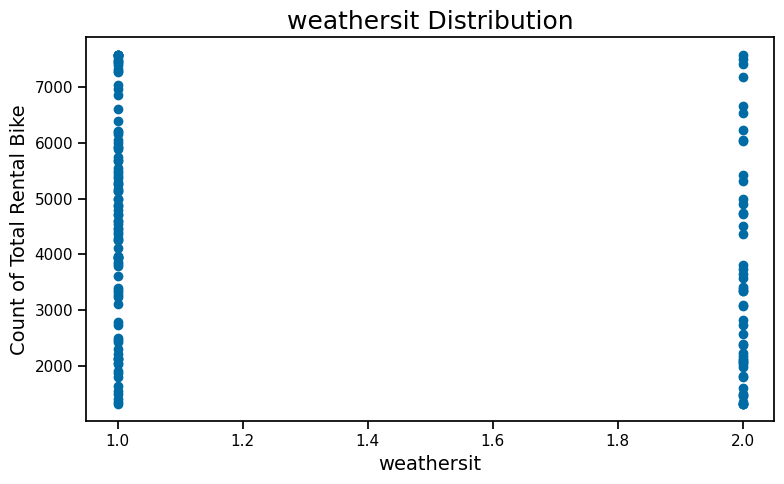

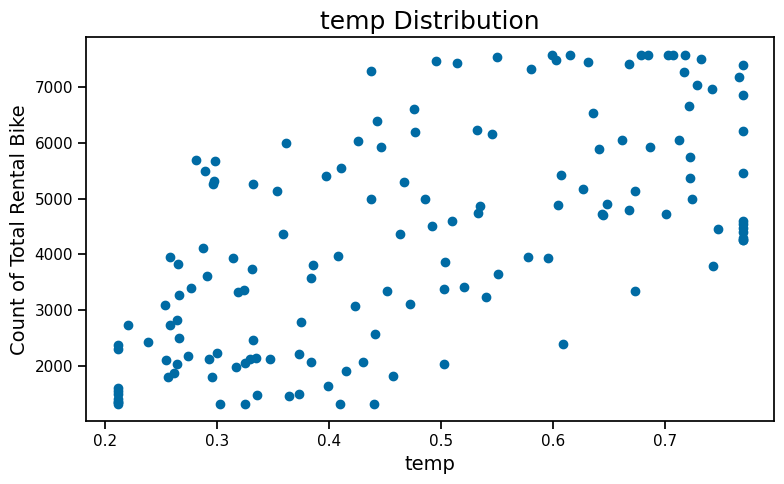

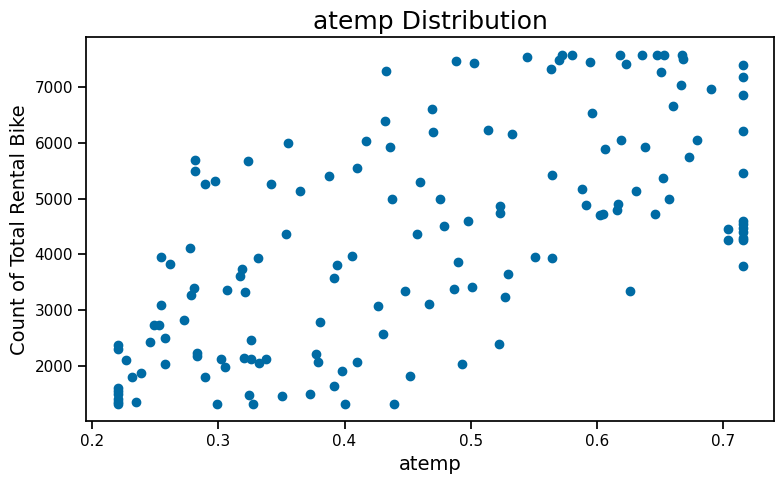

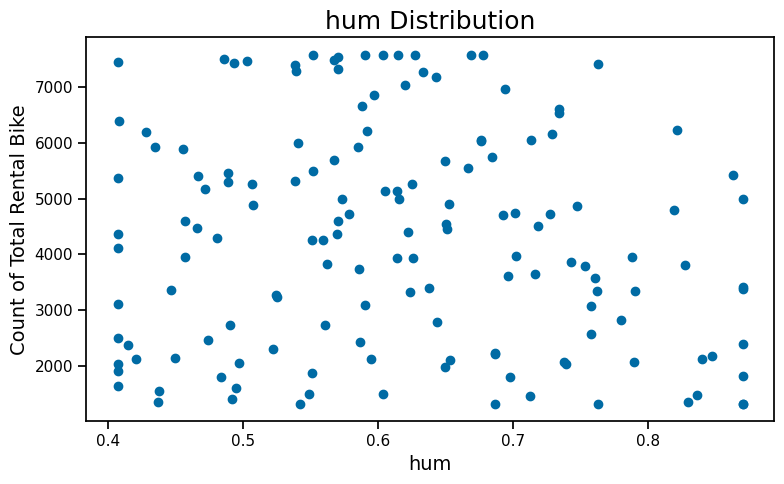

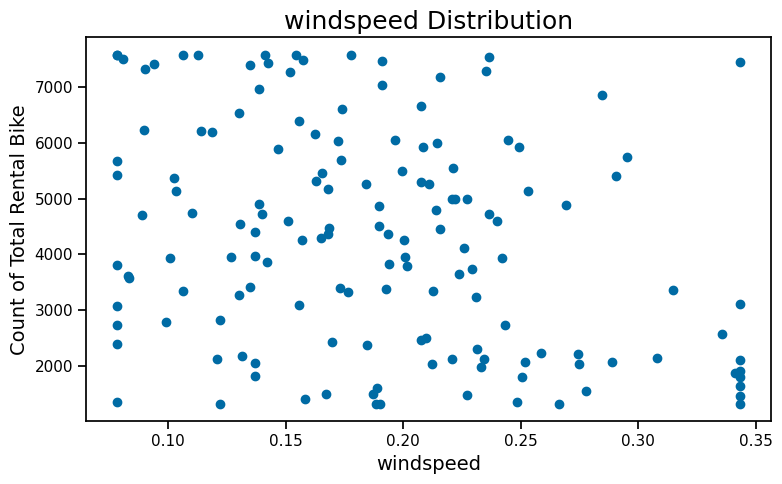

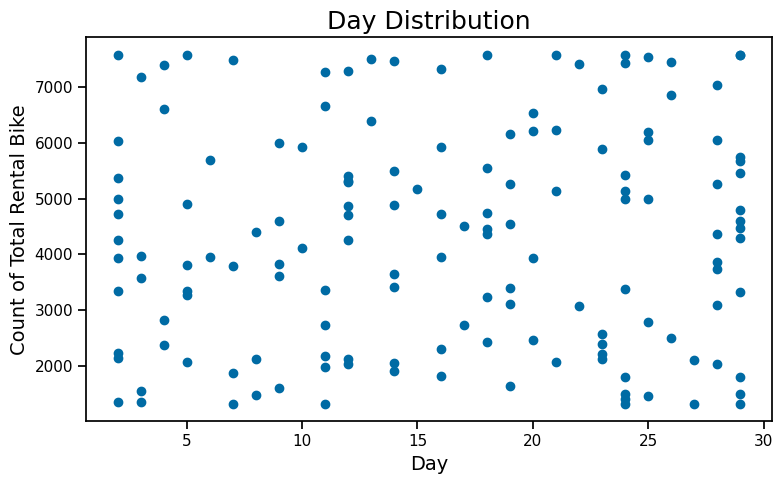

In [26]:
for col in X_test:
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 5)
    ax.scatter(X_test[col], y_test)
    ax.set_title(f'{col} Distribution', fontsize = 18)
    ax.set_xlabel(f'{col}', fontsize = 14)
    ax.set_ylabel(f'Count of Total Rental Bike', fontsize = 14)
    plt.tight_layout()
    plt.show()

In [27]:
residual = y_test - y_pred

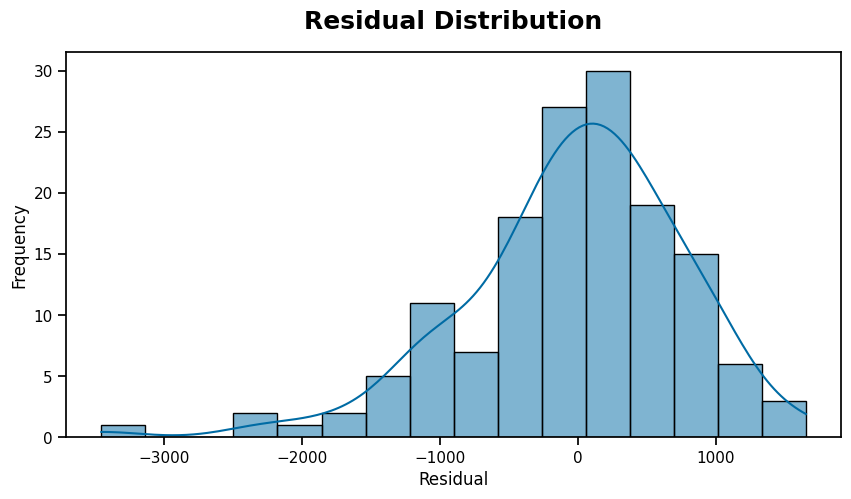

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
g = sns.histplot(residual, kde = True)
g.set_title('Residual Distribution', fontsize = 18, y = 1.04, fontweight = 'bold')
g.set_xlabel('Residual', fontsize = 12)
g.set_ylabel('Frequency', fontsize = 12)
plt.show()

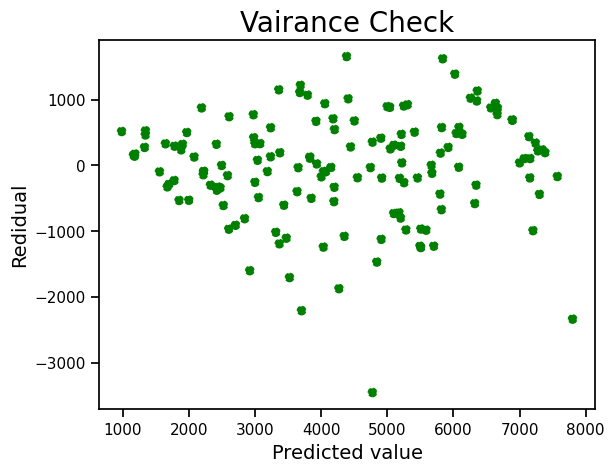

In [29]:
fig, ax = plt.subplots()
ax.scatter(x = y_pred, y = residual, color = 'green', linestyle = '--')
ax.set_title("Vairance Check", fontsize = 20)
ax.set_xlabel("Predicted value", fontsize = 14)
ax.set_ylabel("Redidual", fontsize = 14)
plt.show()

# The vairance of residaul should not depend on the prediction and it shoulb be evenly spread.

Testing My model

In [30]:
data = {
    "season": [1, 2, 3, 4, 1],       
    "yr": [0, 0, 1, 1, 0],           
    "mnth": [1, 6, 9, 12, 3],        
    "holiday": [0, 1, 0, 0, 1],      
    "weekday": [0, 2, 4, 6, 1],      
    "workingday": [1, 0, 1, 0, 0],   
    "weathersit": [1, 2, 3, 1, 2],   
    "temp": [0.24, 0.65, 0.80, 0.15, 0.40],   
    "atemp": [0.28, 0.60, 0.79, 0.12, 0.42],  
    "hum": [0.80, 0.60, 0.55, 0.90, 0.72],    
    "windspeed": [0.10, 0.25, 0.35, 0.05, 0.18],  
    "Day": [5, 14, 22, 30, 9]        
}

test = pd.DataFrame(data)
test

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,Day
0,1,0,1,0,0,1,1,0.24,0.28,0.80,0.10,5
1,2,0,6,1,2,0,2,0.65,0.60,0.60,0.25,14
2,3,1,9,0,4,1,3,0.80,0.79,0.55,0.35,22
3,4,1,12,0,6,0,1,0.15,0.12,0.90,0.05,30
4,1,0,3,1,1,0,2,0.40,0.42,0.72,0.18,9


In [31]:
y_pred = model.predict(test).astype(int)
y_pred

array([1813, 3495, 6676, 3982, 1931])

  0%|          | 0/147 [00:00<?, ?it/s]

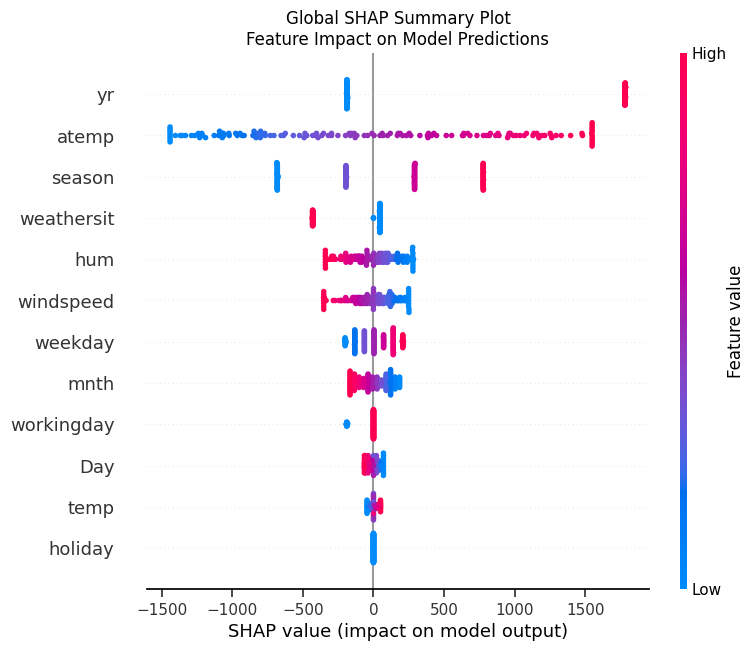

In [32]:
explainer = shap.KernelExplainer(model.predict, shap.kmeans(X_test, 10))
# Compute SHAP values for all test samples
shap_values = explainer.shap_values(X_test)
# Mean absolute SHAP values (global importance measure)
mean_abs_value = np.abs(shap_values).mean(axis=0)

# Global explainability summary plot (dot type)
shap.summary_plot(shap_values, X_test, plot_type='dot', show=False)

# Add a title
plt.title("Global SHAP Summary Plot\nFeature Impact on Model Predictions", fontsize=12)

plt.show()


  0%|          | 0/1 [00:00<?, ?it/s]

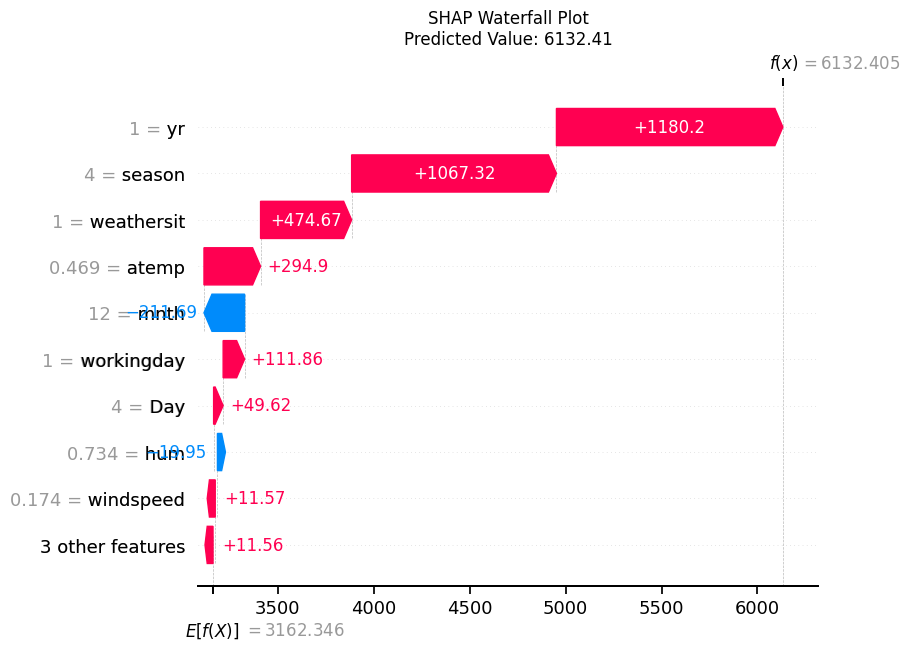

In [33]:
# Create the explainer
explainer = shap.KernelExplainer(model.predict, shap.kmeans(test, 2))

# Pick a single row (instance) - keep as DataFrame
test_single_instance = X_test.iloc[[0]]

# Get SHAP values for that single instance
shap_values = explainer.shap_values(test_single_instance)

# shap_values has shape (1, n_features), so take the first row
shap_values_instance = shap_values[0]

# Create Explanation object for waterfall plot
shap_exp = shap.Explanation(
    values       = shap_values_instance,
    base_values  = explainer.expected_value,
    data         = test_single_instance.iloc[0],
    feature_names= test.columns
)

# Plot waterfall
shap.plots.waterfall(shap_exp, show=False)

# Add a meaningful title
plt.title(
    f"SHAP Waterfall Plot\n"
    f"Predicted Value: {model.predict(test_single_instance)[0]:.2f}",
    fontsize=12
)

plt.show()

In [34]:
import joblib 
joblib.dump(model, 'Bike.pkl')

['Bike.pkl']